Recommended Hotels for User 1:
   hotel_name  price
16   Hotel 17     94
7     Hotel 8    432
19   Hotel 20    446
15   Hotel 16    341
6     Hotel 7    316
Mean Squared Error (MSE): 0.5572252135819483


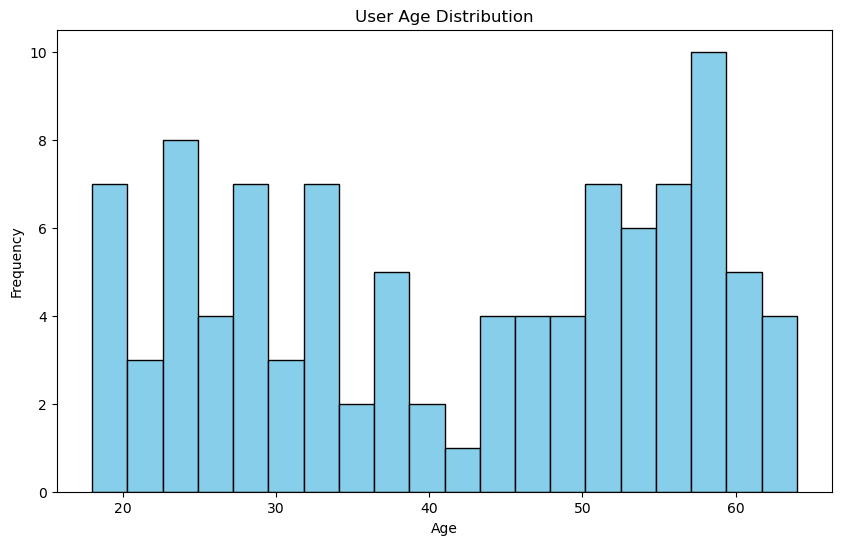

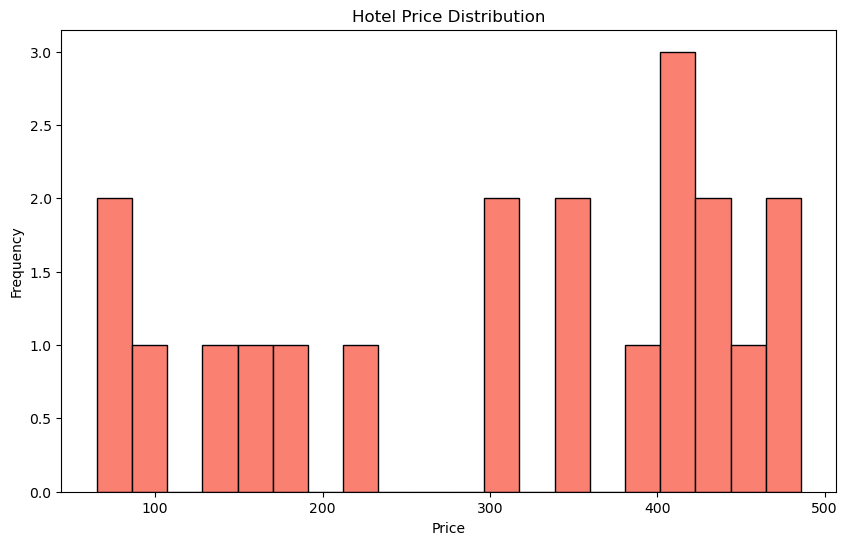

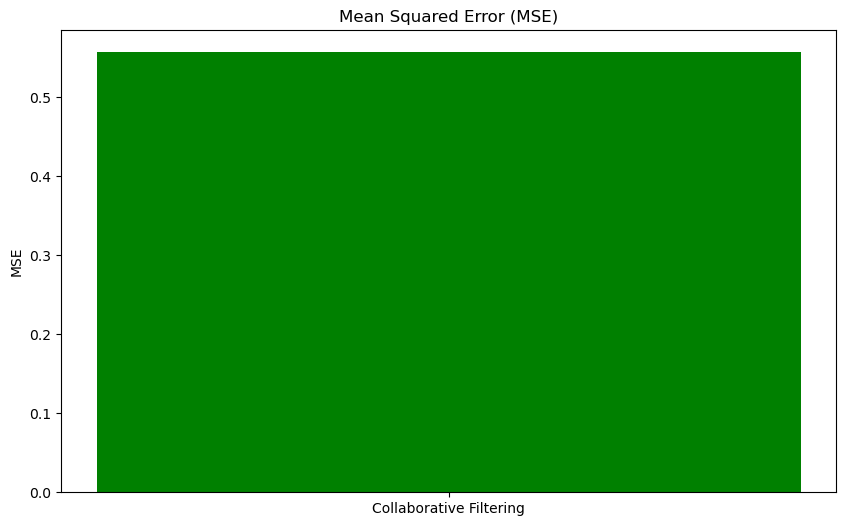

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# 1. Generate synthetic data for user, hotel, and booking
def generate_synthetic_data(n_users=100, n_hotels=20, n_bookings=200):
    # User Data
    user_data = pd.DataFrame({
        'user_id': np.arange(1, n_users + 1),
        'age': np.random.randint(18, 65, size=n_users),
        'location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=n_users)
    })

    # Hotel Data
    hotel_data = pd.DataFrame({
        'hotel_id': np.arange(1, n_hotels + 1),
        'hotel_name': [f'Hotel {i}' for i in range(1, n_hotels + 1)],
        'price': np.random.randint(50, 500, size=n_hotels),
        'location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=n_hotels)
    })

    # Booking Data (user-item interactions with ratings)
    booking_data = pd.DataFrame({
        'user_id': np.random.choice(user_data['user_id'], size=n_bookings),
        'hotel_id': np.random.choice(hotel_data['hotel_id'], size=n_bookings),
        'rating': np.random.randint(1, 6, size=n_bookings)
    })

    return user_data, hotel_data, booking_data

user_data, hotel_data, booking_data = generate_synthetic_data()

In [ ]:
# 2. Preprocess Data (Create User-Item Interaction Matrix)
def create_user_item_matrix(booking_data, n_users, n_hotels):
    user_item_matrix = np.zeros((n_users, n_hotels))
    for row in booking_data.itertuples():
        user_item_matrix[row.user_id - 1, row.hotel_id - 1] = row.rating
    return user_item_matrix

user_item_matrix = create_user_item_matrix(booking_data, n_users=100, n_hotels=20)

In [ ]:
# 3. Collaborative Filtering with Matrix Factorization (SVD)
def collaborative_filtering(user_item_matrix, n_components=5):
    svd = TruncatedSVD(n_components=n_components)
    matrix_factorization = svd.fit_transform(user_item_matrix)
    return matrix_factorization, svd

matrix_factorization, svd = collaborative_filtering(user_item_matrix, n_components=5)


In [ ]:
# 4. Making Hotel Recommendations for a User
def recommend_hotels(user_id, matrix_factorization, hotel_data, top_n=5):
    user_idx = user_id - 1
    user_vector = matrix_factorization[user_idx, :]
    predicted_ratings = user_vector.dot(svd.components_)
    top_hotels_idx = predicted_ratings.argsort()[::-1][:top_n]
    top_hotels = hotel_data.iloc[top_hotels_idx]
    return top_hotels[['hotel_name', 'price']]

# Example: Get top 5 hotel recommendations for User 1
recommended_hotels = recommend_hotels(user_id=1, matrix_factorization=matrix_factorization, hotel_data=hotel_data, top_n=5)
print(f"Recommended Hotels for User 1:")
print(recommended_hotels)

In [ ]:
# 5. Evaluating the Model (Mean Squared Error)
def evaluate_model(user_item_matrix, matrix_factorization, svd):
    reconstructed_matrix = matrix_factorization.dot(svd.components_)
    mse = mean_squared_error(user_item_matrix, reconstructed_matrix)
    return mse

mse = evaluate_model(user_item_matrix, matrix_factorization, svd)
print(f"Mean Squared Error (MSE): {mse}")


In [ ]:
# 6. Visualization of Results
def visualize_results(mse, user_data, hotel_data):
    # User Age Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(user_data['age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('User Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
    
    # Hotel Price Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(hotel_data['price'], bins=20, color='salmon', edgecolor='black')
    plt.title('Hotel Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
    
    # MSE Plot
    plt.figure(figsize=(10, 6))
    plt.bar(['Collaborative Filtering'], [mse], color='green')
    plt.title('Mean Squared Error (MSE)')
    plt.ylabel('MSE')
    plt.xticks([0], ['Collaborative Filtering'])
    plt.show()

# Visualizing the results
visualize_results(mse, user_data, hotel_data)